In [ ]:
### 구글 드라이브 마운트
## Colab으로 문제 풀이를 하시는 분들만 실행해 주시면 됩니다.

from google.colab import drive
drive.mount('/content/drive')

# **1. GBM**
- 물 가용성 데이터를 활용합니다
- `water_potability.csv` 데이터셋을 다운로드 후 실습을 진행해 주세요.


## **1-1. 빈칸을 채워주세요. (5개)**

- 아래의 셀을 실행시킨 후에 실습을 진행해주세요
- 데이터 파일 경로 확인해주세요

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
### 데이터 준비

# 데이터 불러오기
water = pd.read_csv('./water_potability.csv') # 파일 경로 확인
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          2293 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2293 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


In [4]:
# Feature, Target 분리
X = water.drop('Potability', axis = 1)
y = water['Potability']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

print(X_train.shape, X_test.shape)

(1834, 9) (459, 9)


- GradientBoostingClassifier 클래스를 이용하여 `물 가용성 데이터 세트` 예측/분류
- GBM 학습 시간 측정


In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time()-start_time))

GBM 정확도: 0.6536
GBM 수행 시간: 2.2 초 


### **GridSearchCV를 이용한 하이퍼 파라미터 최적화**

📍GBM 하이퍼 파라미터
  - `loss`: 경사 하강법에서 사용할 비용 함수 지정
  - `learning_rate`: GBM이 학습을 진행할 때마다 적용하는 학습률
  - `n_estimators`: weak learner의 개수
  - `subsample`: weak learner가 학습에 사용하는 데이터의 샘플링 비율

## **1.2 아래의 파라미터가 의미하는 것을 각각 서술하세요.**


In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1],
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 100}
최고 예측 정확도: 0.6423


### 답안
- 마크다운을 풀어서 답안을 작성 해주세요.


1) 'n_estimators':[100, 500]

: weak learner의 개수를 말한다. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있다. 하지만 개수가 많을수록 수행 시간이 오래 걸린다. 기본값을 100. 위에서는 n_estimators 100과 500 사이에 어떤 것이 최적 하이퍼 파라미터인지 검사하였다.

2)'learning_rate' : [ 0.05, 0.1]

: GBM이 학습을 진행할 때마다 적용하는 학습률이다. Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수이다. 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1이다. 너무 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높다. 하지만 많은 weak learner는 순차적인 반복이 필요하여, 수행 시간이 오래 걸리고 또 너무 작게 설정하면 모든 weak learner의 반복이 완료되어도 최소 오류 값을 찾지 못할 수 있다. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능하다. 위에서는 0.05와 0.1 중 어떤 것이 최적 하이퍼 파라미터인지 검사하였다.

# **2. XGBoost**

- 타이타닉 데이터를 활용합니다
- `titanic.csv` 데이터셋을 다운로드 후 실습을 진행해 주세요.

**데이터 준비**

In [9]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Titanic 데이터셋
titanic_df = pd.read_csv('./titanic.csv') # 파일 경로 확인

# 관련 없는 열 또는 고유한 값이 너무 많은 열 제거
titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 결측값 채우기
titanic_df.fillna(method='ffill', inplace=True)  # Filling NaN values with forward fill method

# 범주형 열을 숫자로 변환(Label Encoding)
label_encoders = {}
for col in ['Sex', 'Embarked']:
    label_encoders[col] = LabelEncoder()
    titanic_df[col] = label_encoders[col].fit_transform(titanic_df[col])

In [11]:
# features과 target variable 분리
X_features = titanic_df.drop(columns=['Survived'])
y_label = titanic_df['Survived']

# 학습용 데이터, 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

# 데이터를 DMatrix 형식으로 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

(712, 8) (179, 8)


## **2-1. XGBoost의 하이퍼 파라미터 설정에 따라 파라미터 목록을 완성해 주세요.**

- 트리의 최대 깊이: 5  
- 학습률(eta): 0.05  
- 이진 분류 문제  
  - 오류 함수의 평가 성능 지표는 `error`
- 부스팅 반복 횟수: 500회  

In [12]:
# Parameters for XGBoost model
params = {
    'max_depth':5, 
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metric':'error'
         }

# 부스팅 반복 횟수 지정
num_rounds = 500


- 아래 코드들을 실행하여 결과를 확인해 보세요!

In [13]:
# XGBoost 모델 학습
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      evals=wlist,  verbose_eval = 0)

# 확률 예측
pred_probs = xgb_model.predict(dtest)
print('Predicted probabilities (first 10):')
print(np.round(pred_probs[:10],3))

# 확률을 예측값으로 변환
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('Predicted labels (first 10):', preds[:10])

Predicted probabilities (first 10):
[0.443 0.008 0.071 0.171 0.986 0.026 0.72  0.67  0.008 0.016]
Predicted labels (first 10): [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]


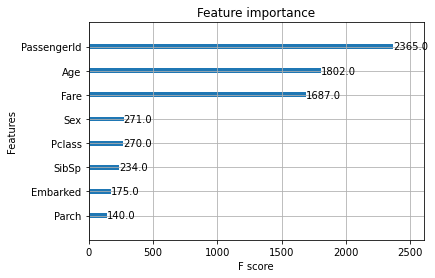

In [14]:
# Feature Importance 그리기

plot_importance(xgb_model)
plt.show()

## **2.2 파이썬 래퍼를 사용하여 XGBoost 모델을 학습할 때 입력 데이터를 특정 형식으로 변환하여 사용합니다.이 변환을 수행하는 함수는 무엇입니까?**

### **답안**  
DMatrix 이다. 이 함수의 주요 파라미터는 data와 label로 data는 피처 데이터 세트, label은 분류의 경우에 레이블 데이터 세트, 회귀의 경우에 종속값 데이터 세트이다. 넘파이, DataFrame, Series 외에 libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력 받아 변환할 수 있다.

## **2.3. 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier를 사용하여 XGBoost 분류기를 학습하는 코드를 완성하세요.**
- 추정기 개수: 200
- 학습률: 0.1
- 트리의 최대 깊이: 4

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [17]:
# XGBoost 모델 학습
xgb_wrapper = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4)
xgb_wrapper.fit(X_train, y_train)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

- 아래 코드를 실행하여 결과를 확인해 보세요!

In [18]:
# 분류 모델 평가 함수 정의 및 호출

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
# 모델 평가 수행

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[92 15]
 [24 48]]
정확도: 0.7821, 정밀도: 0.7619, 재현율: 0.6667,    F1: 0.7111, AUC:0.8315


## **2-4. 아래 코드에서 조기 중단 설정이 어떻게 변경되며, 이러한 변화가 예측 성능에 미칠 수 있는 영향에 대해 서술하세요.**



In [20]:
xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6)
evals = [(X_test, y_test)]

In [21]:
### 첫 번째 학습

# XGBClassifier 모델 학습 (조기 중단 설정)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

[0]	validation_0-logloss:0.65098
[1]	validation_0-logloss:0.61688
[2]	validation_0-logloss:0.58865
[3]	validation_0-logloss:0.56741
[4]	validation_0-logloss:0.54690
[5]	validation_0-logloss:0.53157
[6]	validation_0-logloss:0.51873
[7]	validation_0-logloss:0.50877
[8]	validation_0-logloss:0.50005
[9]	validation_0-logloss:0.49316
[10]	validation_0-logloss:0.48663
[11]	validation_0-logloss:0.48328
[12]	validation_0-logloss:0.47694
[13]	validation_0-logloss:0.47272
[14]	validation_0-logloss:0.46782
[15]	validation_0-logloss:0.46400
[16]	validation_0-logloss:0.46288
[17]	validation_0-logloss:0.45948
[18]	validation_0-logloss:0.45821
[19]	validation_0-logloss:0.45535
[20]	validation_0-logloss:0.45512
[21]	validation_0-logloss:0.45426
[22]	validation_0-logloss:0.45343
[23]	validation_0-logloss:0.45193
[24]	validation_0-logloss:0.44929
[25]	validation_0-logloss:0.44932
[26]	validation_0-logloss:0.44828
[27]	validation_0-logloss:0.44662
[28]	validation_0-logloss:0.44736
[29]	validation_0-loglos

In [22]:
### 두 번째 학습

# 조기 중단 설정 변경
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65098
[1]	validation_0-logloss:0.61688
[2]	validation_0-logloss:0.58865
[3]	validation_0-logloss:0.56741
[4]	validation_0-logloss:0.54690
[5]	validation_0-logloss:0.53157
[6]	validation_0-logloss:0.51873
[7]	validation_0-logloss:0.50877
[8]	validation_0-logloss:0.50005
[9]	validation_0-logloss:0.49316
[10]	validation_0-logloss:0.48663
[11]	validation_0-logloss:0.48328
[12]	validation_0-logloss:0.47694
[13]	validation_0-logloss:0.47272
[14]	validation_0-logloss:0.46782
[15]	validation_0-logloss:0.46400
[16]	validation_0-logloss:0.46288
[17]	validation_0-logloss:0.45948
[18]	validation_0-logloss:0.45821
[19]	validation_0-logloss:0.45535
[20]	validation_0-logloss:0.45512
[21]	validation_0-logloss:0.45426
[22]	validation_0-logloss:0.45343
[23]	validation_0-logloss:0.45193
[24]	validation_0-logloss:0.44929
[25]	validation_0-logloss:0.44932
[26]	validation_0-logloss:0.44828
[27]	validation_0-logloss:0.44662
[28]	validation_0-logloss:0.44736
[29]	validation_0-loglos

### **답안**  
조기 중단값이 100에서 10으로 급격하게 줄었다. 이 케이스에서는 예측 성능이 눈에 띄게 저하되지는 않았지만 조기 중단값을 급격하게 줄이면 예측 성능이 저하될 우려가 크다. 조기 중단값을 10처럼 급격하게 줄이게 되면 아직 성능이 향상될 여지가 있음에도 불구하고 10번 반복하는 동안 성능 평가지표가 향상되지 않으면 반복이 멈춰버려서 충분한 학습이 되지 않는다. 그렇게 되면 예측 성능이 나빠질 수 있다.  

# **3. LightGBM**

## **3-1.**
- 해당 실습에서는 `피마 당뇨병` 데이터를 활용합니다.

In [23]:
### 실습을 위한 lgbm 다운그레이드
# 아래 코드를 실행시켜 주세요.

!pip install lightgbm==3.3.2


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# 제대로 다운그레이드 되었는지 확인

import lightgbm
print(lightgbm.__version__)

3.3.2


### **Step1) 데이터 로드**


In [25]:
from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import early_stopping

In [26]:
### 아래 코드를 실행시켜 주세요.
## csv 파일 경로를 알맞게 수정해 주세요.

# data load: 피마 당뇨병 데이터 셋
diabetes = pd.read_csv('./diabetes.csv') # 경로 설정
print(diabetes['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


### **Step 2) 데이터 Split**
- 아래 코드를 실행시켜 주세요.

In [27]:
y = diabetes['Outcome']
X = diabetes.drop('Outcome', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

### **Step 3) 모델 학습**
- 아래 코드의 빈칸을 채워주세요.  
(힌트 : 교재 p.251)



In [28]:
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

evals = [(X_train, y_train), (X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                 eval_metric='logloss', eval_set=evals, verbose=True)

[1]	training's binary_logloss: 0.600344	valid_1's binary_logloss: 0.630031
[2]	training's binary_logloss: 0.567162	valid_1's binary_logloss: 0.607335
[3]	training's binary_logloss: 0.536827	valid_1's binary_logloss: 0.585795
[4]	training's binary_logloss: 0.51073	valid_1's binary_logloss: 0.566393
[5]	training's binary_logloss: 0.489147	valid_1's binary_logloss: 0.551676
[6]	training's binary_logloss: 0.468568	valid_1's binary_logloss: 0.541892
[7]	training's binary_logloss: 0.450255	valid_1's binary_logloss: 0.535487
[8]	training's binary_logloss: 0.433799	valid_1's binary_logloss: 0.526912
[9]	training's binary_logloss: 0.419135	valid_1's binary_logloss: 0.518037
[10]	training's binary_logloss: 0.405085	valid_1's binary_logloss: 0.512287
[11]	training's binary_logloss: 0.392639	valid_1's binary_logloss: 0.511588
[12]	training's binary_logloss: 0.38106	valid_1's binary_logloss: 0.504413
[13]	training's binary_logloss: 0.371875	valid_1's binary_logloss: 0.49867
[14]	training's binary_l

LGBMClassifier(n_estimators=400)

### **Step 4) 예측**
- 아래 코드를 실행시켜 주세요.

In [29]:
# 예측
y_pred = lgbm_wrapper.predict(X_test)

# 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.3f}')

accuracy: 0.747


## **3-2. 예측 시각화**


### **문제**
- 다음과 같은 코드 오류가 발생했습니다.
  - 오류를 해결할 수 있는 코드를 한 줄 추가해 주세요.

```
NameError                                 Traceback (most recent call last)
Cell In[2], line 5
      2 get_ipython().run_line_magic('matplotlib', 'inline')
      4 fig, ax = plt.subplots(figsize=(10, 12))
----> 5 plot_importance(lgbm_wrapper, ax=ax)
      6 plt.show()

NameError: name 'plot_importance' is not defined
```

(힌트 : 교재 p.259)


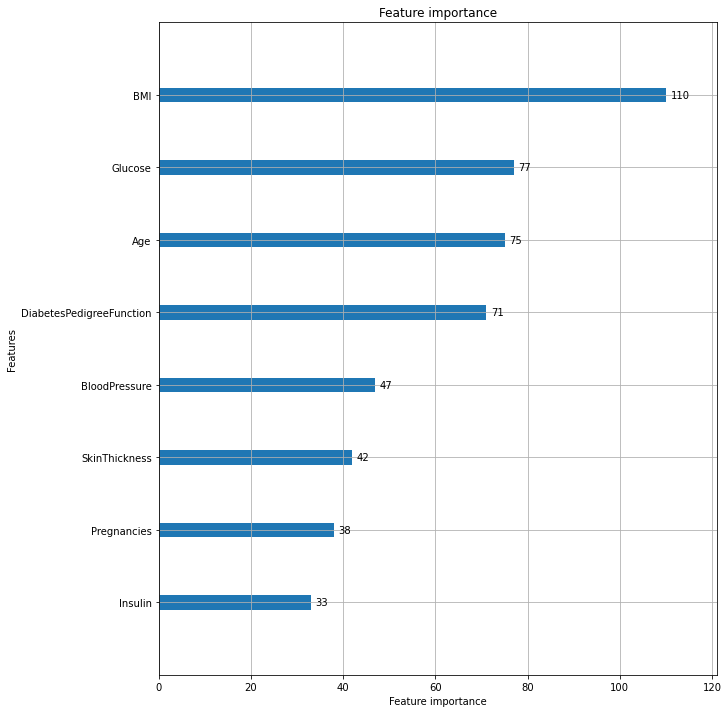

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

# 필요한 코드를 추가해 주세요.
from lightgbm import plot_importance

# 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()

# **4. 스태킹**

## **4-1. 기본 스태킹 모델**

- 아래 코드를 실행시켜 주세요.

In [33]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier 생성
lr_final = LogisticRegression(C=10)

### **Step 1) 스태킹에 활용할 개별 모델을 학습시켜 주세요.**

In [35]:
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

- 아래 코드를 실행시켜 주세요.

In [36]:
# 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.6688
랜덤 포레스트 정확도: 0.7468
결정 트리 정확도: 0.6623
에이다부스트 정확도: 0.7273


### **Step 2) 다음과 같이 출력되도록 `transpose`를 이용해 행과 열의 위치를 교환하는 코드를 작성해 주세요.**
   
```
(4, 154)
(154, 4)
```

(힌트 : 교재 p.281)

In [37]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환하는 코드를 작성해 주세요.
# 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듭니다.

pred = np.transpose(pred)
print(pred.shape)

(4, 154)
(154, 4)


- 아래의 코드를 실행시켜 주세요.

In [38]:
# 최종 메타 모델 학습/예측

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.7468


## **4-2. CV 기반 스태킹**



- CV 세트 기반의 스태킹은 최종 메타 모델을 위한 데이터 세트를 만들 때, 교차 검증 기반으로 예측된 결과 데이터 세트를 이용합니다.
- 또한 CV 세트 기반의 스태킹 과정은 크게 Step1과 Step2, 두가지로 나눌 수 있습니다.

### **Step1)**

**개별 모델**
- 교차검증으로 메타모델을 위한 학습용  데이터, 테스트용 데이터 생성

### **Step 2)**
- 학습용 데이터: 스태킹 형태로 합치기 → 최종 학습용 데이터 세트 생성
- 테스트용 데이터 : 스태킹 형태로 합치기 → 최종 테스트 데이터 세트 생성

**최종 모델**
- 최종 학습용 데이터 세트 + 원본 학습 데이터의 레이블 데이터를 기반으로 학습
→ 최종 테스트 데이터 세트로 예측 + 원본 테스트 데이터의 레이블 데이터와 비교해 평가   
<br/>


---

### **문제**
그렇다면,
<br/>
> **“학습용 데이터를 N개의 폴드로 나눈다”**
는 Step1과 Step2중 어느 단계에 속할까요?   

힌트 : 교재 p.283

### **👇정답을 적어주세요!**

정답 : Step 1 단계에 해당한다. Step 1 에서, 먼저 학습용 데이터를 N개의 폴드로 나눈다.

# 5. **HyperOpt**


- 사이킷런의 `boston 주택 가격 데이터`를 사용합니다.
- 아래의 셀을 실행시킨 후 실습을 진행해 주세요.

In [39]:
import pandas as pd
import numpy as np
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [40]:
# load dataset

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

## **5.1. `train_test_split()`를 사용하여 훈련 세트와 테스트 세트로 나누어 주세요.**

- random_state = 207
- train: test = 8:2

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=207)

---

- 이제 평가 함수를 정의하겠습니다.  
- 교재와 다르게 Regression 예측을 진행할 예정이기 때문에,` RMSE` 평가 지표를 함수로 만들어 정의합니다.

In [42]:
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

## **5.2. search_space의 빈칸을 채워주세요.**

- `max_depth`: 5에서 20까지 1간격으로
- `min_child_weight`: 1에서 10까지 1간격으로  
- `learning_rate`: 0.01에서 0.2 사이 정규 분포 값
- `colsample_bytree`: 0.5에서 1 사이 정규 분포 값

In [43]:
from hyperopt import hp

# space 정의, Hyperparameter의 이름을 key 값으로 입력
search_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
    }

## **5.3. objective_func의 빈칸을 채워주세요.**  
- `int` 타입을 가져야 하는 hyperparameter에 주의해 주세요.

In [44]:
from xgboost import XGBRegressor
from hyperopt import STATUS_OK

In [45]:
# 목적 함수 정의
def objective_func(search_space):
    model=XGBRegressor(n_estimators=100,
                       max_depth=int(search_space['max_depth']),
                       min_child_weight = int(search_space['min_child_weight']),
                       learning_rate = search_space['learning_rate'],
                       colsample_bytree = search_space['colsample_bytree'],
                      )

    evaluation = [(x_train, y_train), (x_test, y_test)]

    model.fit(x_train, y_train,
          eval_set=evaluation,
          eval_metric="rmse",
          early_stopping_rounds=20,
          verbose=0)

    pred = model.predict(x_test)
    rmse= RMSE(y_test, pred)

    # 평가 방식 선정
    return {'loss':rmse, 'status': STATUS_OK, 'model': model}

## **5.4. 성능 지표에 -1을 곱하지 않는 이유가 무엇일까요?**
(hint. 추가 교재 pdf p264)  
(hint2. RMSE는 작을수록 좋은 성능 지표이다.)

### **답안**  
HyperOpt의 목적 함수는 최솟값을 반화날 수 있도록 최적화해야 하기 때문에 정확도와 같이 값이 클수록 좋은 성능 지표일 경우 -1을 곱한 뒤 반환하여, 더 큰 성능 지표가 더 작은 반환값이 되도록 만들어주어야 한다. 그러나 fmin() 함수는 최솟값을 최적화하므로 0.9보다 0.8을 더 좋은 최적화로 판단한다. 이런 경우엔 정확도에 -1을 곱해주게 되면 -0.9가 -0.8보다 더 작아지게 되어 fmin() 함수는 -0.9를 더 좋은 최적화로 판단하게 된다. RMSE 역시 fmin()과 같이 작을수록 좋은 성능지표이기 때문에 -1을 곱해줄 필요가 없다.

## **5.5. `fmin()`을 이용해 최적 하이퍼 파라미터를 도출하는 과정입니다.**

**빈칸을 채워주세요**

In [47]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# best에 최적의 하이퍼 파라미터를 return 받습니다.
best = fmin(fn = objective_func,
            space = search_space,
            algo = tpe.suggest,
            max_evals = 50,
            trials = trials,
            rstate=np.random.default_rng(seed=9))

100%|████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.59trial/s, best loss: 2.6862629600256436]


## **5.6. 최적의 하이퍼 파라미터를 출력해주세요.**  
- 정수형 파라미터는 정수형으로 형변환하고, 실수형 파라미터는 소수점 5자리까지만 변환해주세요

In [48]:
## 답안

print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.86377, learning_rate:0.10658, max_depth:8, min_child_weight:7
